In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
mpl.rcParams['text.usetex'] = True
dvals = {
    "code2vec":r"$\textsc{code2vec}$", 
    'HCB':r"$\textsc{HC(Binary)}$",
    'HCN':r"$\textsc{HC(Norm)}$",
    'HCNCX':r"$\textsc{HC(Norm)+CX(Norm)}$"
}
fvecs = ["HCB","HCN","HCNCX","code2vec"]

In [3]:
# Output of info_gain_method.py

#('handcrafted', 'HC33/binary/binary', True)
equals_hcb = [0.14393791479552362, 0.3856302712413469, 0.322290781376245, 0.20204819588408432, 0.02672372368069588, 0.1180203113137019, 0.012717551775004526, 0.011930508380568916, 0.16896283906674062, 0.01335380385829063, 0.04167590363760105, 0.03077169378921507, 0.03522712640608214, 0.02198351925019336, 0.028191749907384406, 0.026974745512780937, 0.009449861843194282, 0.022709731776772463, 0.014616479033740502, 0.004526720036206834, 0.008038088369758743, 0.012887827198087957, 0.011576128137450929, 0.02294890214269796, 0.001072296314043264, 0.022346487770038503, 0.07650640653887242, 0.018095601421237055, 0.001040847461297796, 0.016571756141164046, 0.002013082399357425, 0.25667931123623017, 0.009069741787155194]
# rank_cols (8) = ['e1', 'e2', 'e3', 'e4', 'e6', 'e9', 'e27', 'e32']

#('handcrafted', 'HC33/binary/norm', False)
equals_hcn = [0.1470638612897872, 0.41301862642932496, 0.3277463354132035, 0.2085568620583078, 0.03560217578201086, 0.11558750493309367, 0.0010079909313438495, 0.016073996657643752, 0.17735922029347084, 0.013358962590403811, 0.04141967844221317, 0.0318697342159282, 0.014914426570867612, 0.03441219248958971, 0.029253897568136678, 0.031257651738802794, 0.027353868081257726, 0.03795361598697289, 0.020160592225368923, 0.0, 0.004049572674763802, 0.03887000532813967, 0.028778637222481418, 0.05330447058009802, 0.0015718880321529127, 0.015015658549673239, 0.0662146975223965, 0.004794588082746243, 0.01592539464754439, 0.0, 0.01550777037017137, 0.4859505622081264, 0.1230871885189615]
# rank_cols (8) = ['e1', 'e2', 'e3', 'e4', 'e6', 'e9', 'e32', 'e33']

#('handcrafted', 'HC33X/binary/norm', False)
equals_hcncx = [0.14443400497288783, 0.4169686983167562, 0.3263507458714232, 0.20651484002227583, 0.02574307069076598, 0.10478973440945816, 0.0, 0.01728582536256451, 0.16518940528612425, 0.004775661863353209, 0.05391561629436392, 0.055134160850606184, 0.018259777208362582, 0.011063245684760581, 0.03816618582167908, 0.024216445875092862, 0.009565724763129557, 0.0023938032399504205, 0.011152894772155308, 0.022551579981182845, 0.0006898774379404671, 0.022727746442320784, 0.005820794218392544, 0.021909680332163894, 0.011175490095786556, 0.01598939617900319, 0.10380462747548425, 0.00886306826527461, 0.012840652714005696, 0.006390515759457038, 0.008637145621682718, 0.5033867627464963, 0.12565207821605284, 0.12382404536706626, 0.026368793825989778, 0.018544117713788832, 0.2865512204315235, 0.15843190162103093, 0.0854006965450802, 0.04929812574564196, 0.4807946222915711, 0.2414298199122642, 0.1645422996664645, 0.17940687213075113, 0.06672103617440484, 0.07331246548532078, 0.03428202404692127]
# rank_cols (11) = ['e2', 'e3', 'e4', 'e9', 'e32', 'Parameter', 'LocalVariable', 'Jump', 'Decision', 'Condition', 'Instance']

#('code2vec', 'binary', False)
equals_c2v = [0.474417023533269, 0.3568414538665077, 0.6870415195916342, 0.534512646396174, 0.502917185783541, 0.3174886575792424, 0.5618123730505229, 0.4901241568902268, 0.5892653488501978, 0.3293026652154696, 0.5934072013545522, 0.5326442300382412, 0.36025450918074453, 0.5780367611985702, 0.6336699261149484, 0.45597153312377325, 0.5695412272537588, 0.3361633819027452, 0.4671438109291397, 0.4166507914565072, 0.38676686850296593, 0.31261794335216453, 0.2659034277367158, 0.29396569643238535, 0.4541514975115395, 0.3306921142969661, 0.5432020331656597, 0.4094982324032963, 0.269613499258758, 0.39746336598150056, 0.4881339645531333, 0.4807134589610518, 0.2717182973715284, 0.3968594734557598, 0.4495907966568917, 0.4590984408404801, 0.40202086868007947, 0.5494107712969247, 0.37798883774200775, 0.6250826300683191, 0.24921410632030705, 0.5431740849967863, 0.2838591378310791, 0.41076650139109216, 0.30024582635238795, 0.37211323433672927, 0.5575535993921921, 0.3200878200256483, 0.3997046010867613, 0.47731104449547046, 0.5099161684211475, 0.42763868540196537, 0.5630649178397733, 0.5506405263416507, 0.6622471148283354, 0.47507450657272177, 0.39195285198953767, 0.5031231827243885, 0.5553324893761231, 0.46715286262004385, 0.25375065987331547, 0.48839993745593757, 0.45207448350182067, 0.5403511426562382, 0.38097751866538077, 0.35053562855836184, 0.43435367526983315, 0.3364256711830258, 0.661739103105779, 0.4033483415530177, 0.5797881386029211, 0.589864137541805, 0.5269074516313224, 0.5710663559508273, 0.36587830678086464, 0.3565247604679609, 0.37004119438541183, 0.5208584820495197, 0.5317070619353519, 0.5832048852964173, 0.5045494831663531, 0.4274465641552059, 0.2963086845271805, 0.4014617708090904, 0.3753141327283893, 0.5539786892922214, 0.28789348582025465, 0.34132355994068675, 0.3382859805737015, 0.4578836153495449, 0.5418543361115824, 0.3968823200390321, 0.31313891487175916, 0.5292603705454793, 0.4553926392969505, 0.3230693215692084, 0.35694048697905045, 0.5091482887571803, 0.4757898510081864, 0.29575605898655266, 0.3566397438616611, 0.3916914167371295, 0.4567472666733683, 0.5480559760972776, 0.45975784787103513, 0.6294028867965709, 0.530048868202788, 0.3243023599940895, 0.409303459610717, 0.6262565433780096, 0.32425713125932654, 0.5655152134346741, 0.38822363667320525, 0.37192080453938914, 0.5565507206202582, 0.25720659757068765, 0.43917207089277066, 0.43927668113317586, 0.5822999643384452, 0.26288894028615406, 0.5403197029333011, 0.43094952903772477, 0.5943267075607848, 0.5542727995463728, 0.4833681356802637, 0.6345532624411719, 0.5328867594712718, 0.5260088245653789, 0.30359663721666674, 0.4171072358712533, 0.5988252914044188, 0.5088662982242671, 0.4127594153524172, 0.3854543758432656, 0.3561038124689233, 0.5776514922003992, 0.32230725704538465, 0.38660124421481146, 0.5136010182362323, 0.24352578706388006, 0.4252238304275533, 0.4894001867417572, 0.3829493279325107, 0.5978341488970136, 0.3627793669868782, 0.29908440249339274, 0.3254722854696692, 0.30751753989530406, 0.3635504468991402, 0.6355478199400036, 0.36350033220007427, 0.390595950558988, 0.6202219782369678, 0.5438398218828226, 0.46666824018392483, 0.5246692322026252, 0.3471878862608273, 0.3232076708415892, 0.2705902664944959, 0.5230082566087138, 0.4759895811858561, 0.5686563245406386, 0.325952407143862, 0.27388683062001107, 0.34452959714981923, 0.5338678913603763, 0.39498172857044445, 0.42139327681346006, 0.6151005406604468, 0.5679923067832573, 0.3576609917328839, 0.29491681113358115, 0.39108424275445386, 0.4960159900014389, 0.42512138462217974, 0.6132724409527377, 0.44143120489079, 0.43604027891997466, 0.37713672645576857, 0.4891310983102437, 0.4683503980584651, 0.48224101464218383, 0.4563477982695088, 0.6686071730166755, 0.3960995207301383, 0.3919739782532923, 0.18669670964940566, 0.3727899685728493, 0.23270365819361905, 0.29002956596732976, 0.5194537120721832, 0.6058868023822703, 0.5197600692996729, 0.6364616446782282, 0.3974799481461535, 0.5412298365317911, 0.4194958056128566, 0.5085584110866275, 0.414926344572494, 0.3497177572952721, 0.35703444936897255, 0.5111066654840073, 0.39994686276867863, 0.3417075421329072, 0.5338280574158247, 0.43544121380903555, 0.4909269957507425, 0.5948665538839943, 0.4071970215614471, 0.3090926741496294, 0.3388442656667101, 0.2800205536426412, 0.6329454976293372, 0.4667215545945491, 0.48375650366580514, 0.6839949650578393, 0.3531368597380755, 0.5166132109440722, 0.5413112526668815, 0.3774267717446429, 0.4524730020243588, 0.3897661122116909, 0.3702073012608873, 0.4734035599641264, 0.44937481694750536, 0.536155909379884, 0.3118605888189363, 0.28585131025044164, 0.5529794754056085, 0.5656413682030215, 0.43895672245532835, 0.26717280470155735, 0.6710432833960097, 0.6361680560666411, 0.402611983280176, 0.4622216045042944, 0.3477117418411444, 0.5596040229051935, 0.4040192163125478, 0.5215412650371516, 0.190270026186802, 0.44130936855514213, 0.2566900383373525, 0.31134381145247314, 0.35645064941707316, 0.587407226563669, 0.3899322620803043, 0.4578203283256883, 0.2853139471682682, 0.4402859908781438, 0.4677308384169081, 0.5760299619812257, 0.33156376586072644, 0.3994316127437758, 0.4869522364110652, 0.5803800339563017, 0.2853927409215953, 0.3460073874820957, 0.4141987712395232, 0.5008282180374153, 0.2915194494294806, 0.293394333892806, 0.4067498109151204, 0.5949427975160364, 0.5791564289245361, 0.5351144722388019, 0.5760930410936196, 0.37776124610570005, 0.3024866686073504, 0.597095935265185, 0.3338273531663851, 0.6201625271579487, 0.3782713572284395, 0.4008406017063679, 0.3493526778773641, 0.3395451624639525, 0.5826902559149214, 0.4252553249457278, 0.5284432001958104, 0.42687987533501426, 0.3169800322704257, 0.4178430293263009, 0.2594715232968743, 0.47168939530133613, 0.3173178250093269, 0.36212214451232594, 0.465258513632512, 0.5824666696897343, 0.6533287422515524, 0.4085688672269543, 0.6157597182402343, 0.5029518829070765, 0.4374737375083322, 0.6278172196315656, 0.3015938936580742, 0.4685149214044497, 0.3878487451092041, 0.5231972073710811, 0.5249527712541369, 0.5378378042503076, 0.413903872723419, 0.4946141951303664, 0.44193848608244735, 0.39767962239945964, 0.31766417028160276, 0.5407204650775137, 0.5285036007378296, 0.4041821001083383, 0.4354414857502973, 0.3209262890156608, 0.45784460583235354, 0.4196180536989893, 0.33038293203936075, 0.3266002211080903, 0.559196930356999, 0.20968757893686685, 0.3607628396176532, 0.4629966944503574, 0.477429481794867, 0.5127958776871986, 0.31658524238840924, 0.5452058034697287, 0.38525133788440447, 0.40182932272682437, 0.5077319197135288, 0.46092465956830186, 0.6472704807396148, 0.44599342354218896, 0.5861195901082716, 0.34680558324239996, 0.4554197039261352, 0.41181944790969593, 0.3215996240874677, 0.36247829148934274, 0.4443742590989399, 0.3710565215765027, 0.33044638478009025, 0.5055727627843158, 0.4194105894839357, 0.5029614168421632, 0.23073083195835387, 0.4551556985576999, 0.44945253065988067, 0.5721026192442136, 0.34424112694254894, 0.545132964913903, 0.4738961611398316, 0.191169114817493, 0.37669357340543397, 0.4371127783210078, 0.4110449022330802, 0.17788649063192263, 0.22926744792699805, 0.46703077515383185, 0.5220231277402811, 0.6136824805482002, 0.5215166864203438, 0.5100011287677091, 0.6032854106478585, 0.39564977662826073, 0.5376238316526454, 0.5777932001233475, 0.40214107548320044, 0.5718922439630683, 0.35329727245675135, 0.31886145782765873, 0.5033603183225999, 0.43568936048588425, 0.25886013592950774, 0.3455433469451612, 0.47565454020507536, 0.4990861886575797, 0.6262862699786624, 0.6672567468851476, 0.40309575441252044, 0.4948057136667132, 0.3806132869411687, 0.2989952818685253, 0.4089144162773892, 0.48340557675327567, 0.39553412169461244, 0.42561522949183184, 0.37774550607341384, 0.34884245710055795]
# rank_cols (95) = ['e3', 'e4', 'e7', 'e9', 'e11', 'e12', 'e14', 'e15', 'e17', 'e27', 'e38', 'e40', 'e42', 'e47', 'e53', 'e54', 'e55', 'e59', 'e64', 'e69', 'e71', 'e72', 'e74', 'e79', 'e80', 'e86', 'e91', 'e94', 'e104', 'e106', 'e107', 'e110', 'e112', 'e115', 'e119', 'e121', 'e123', 'e124', 'e126', 'e127', 'e131', 'e136', 'e144', 'e150', 'e153', 'e154', 'e162', 'e166', 'e169', 'e170', 'e176', 'e184', 'e192', 'e194', 'e196', 'e205', 'e208', 'e213', 'e216', 'e219', 'e226', 'e229', 'e230', 'e233', 'e234', 'e238', 'e246', 'e252', 'e256', 'e264', 'e265', 'e266', 'e267', 'e270', 'e272', 'e277', 'e288', 'e289', 'e291', 'e294', 'e300', 'e306', 'e315', 'e322', 'e327', 'e329', 'e344', 'e346', 'e356', 'e359', 'e361', 'e362', 'e364', 'e373', 'e374']

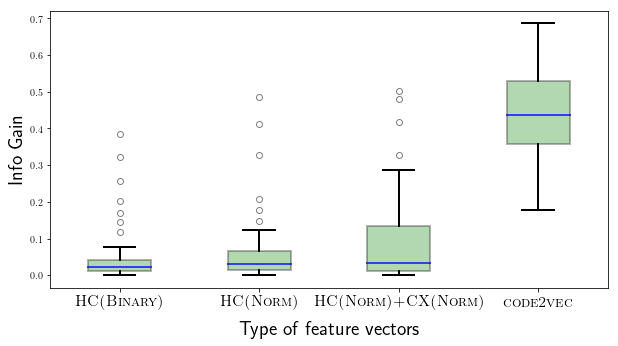

In [4]:
data = [equals_hcb, equals_hcn, equals_hcncx, equals_c2v]

# create boxplot
fig = plt.figure(1, figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)

# set color and style
for box in bp['boxes']:
    box.set(color='black', linewidth=2, alpha=1)
    box.set(facecolor = 'green', alpha=0.3)
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)
for median in bp['medians']:
    median.set(color='blue', linewidth=2, alpha=0.7)
for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=0.5)

# show plot 
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = dvals[fvecs[i]]
ax.set_xticklabels(labels, fontsize=15)
plt.xlabel('Type of feature vectors', labelpad=10, fontsize=20)
plt.ylabel('Info Gain', fontsize=20)
plt.gcf().subplots_adjust(bottom=0.25, top=0.8)
plt.savefig("equals_boxplot.png", dpi=600)
plt.show() 